<a href="https://colab.research.google.com/github/Xinsen-Zhang/torch-study/blob/master/05_%E6%B7%B1%E5%B1%82%E7%A5%9E%E7%BB%8F%E7%BD%91%E7%BB%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 导入必要的包

In [0]:
import numpy as np
import torch
from torchvision.datasets import mnist

from torch import nn
from torch.autograd import Variable

In [0]:
# 使用内置函数下载 mnist 数据集
train_data = mnist.MNIST('./data', train= True, download= True)
test_data = mnist.MNIST('./data', train = False, download= True)

In [0]:
a_data, a_label = train_data[0]

In [25]:
a_data

In [26]:
a_label.cuda()

tensor(5, device='cuda:0')

In [27]:
a_data = np.array(a_data, dtype= 'float32')
a_data.shape

(28, 28)

In [0]:
# 数据变化
def data_tf(x):
    x = np.array(x, dtype= 'float32') / 255
    x = x.reshape(-1,)
    x = torch.from_numpy(x)
    return x

## 数据转换

In [0]:
# 重新加载数据集
train_set = mnist.MNIST('./data', train= True, download= True, transform = data_tf)
test_set = mnist.MNIST('./data', train = False, download= True, transform = data_tf)

## 定义迭代器

In [0]:
from torch.utils.data import DataLoader
train_data = DataLoader(train_set, batch_size= 32, shuffle= True)
test_data = DataLoader(test_set, batch_size= 128, shuffle= False)

## 定义神经网络

In [0]:
net = nn.Sequential(
    nn.Linear(784, 400),
    nn.ReLU(),
    nn.Linear(400, 200),
    nn.ReLU(),
    nn.Linear(200, 100),
    nn.ReLU(),
    nn.Linear(100, 10)
)

In [33]:
from torch.nn import init
for layer in net:
    if(isinstance(layer, nn.Linear)):
        init.xavier_uniform(layer.weight)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  after removing the cwd from sys.path.


In [0]:
# 定义 loss 函数
criterion = nn.CrossEntropyLoss()
# 定义优化器
optimizer = torch.optim.SGD(net.parameters(), lr= 1e-1)
# 导入计时模块
import time

In [35]:
# 开始训练
# 初始化参数
losses = []
acces = []
eval_losses = []
eval_acces = []

# 将模型转换到 gpu 上
net.cuda()

for e in range(20):
    start = time.time()
    train_loss = 0
    train_acc = 0
    # 训练模式
    net.train()
    for im, label in train_data:
        im = Variable(im).cuda()
        label = Variable(label).cuda()
        # 前向传播
        out = net(im)
        loss = criterion(out, label)
        # 反向传播
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        # 记录误差
        train_loss += loss.data
        # 记录准确率
        _, pred = out.max(1)
        num_correct = (pred == label).sum().float().data
        acc = num_correct / im.shape[0]
        train_acc += acc
    
    # 训练的准确率
    train_acc = train_acc / len(train_data)
    # 训练的 loss
    train_loss = train_loss / len(train_data)
    # 记录数据
    losses.append(train_loss)
    acces.append(train_acc)
    
    # 在测试集上检验效果
    eval_loss = 0
    eval_acc = 0
    # 切换检验模式
    net.eval()
    for im, label in test_data:
        im = Variable(im).cuda()
        label = Variable(label).cuda()
        # 前向传播
        out = net(im)
        loss = criterion(out, label)
        # 记录误差
        eval_loss += loss.data
        # 记录准确率
        _, pred = out.max(1)
        num_correct = (pred == label).sum().float().data
        acc = num_correct / im.shape[0]
        eval_acc += acc
    eval_loss = eval_loss / len(test_data)
    eval_acc = eval_acc / len(test_data)
    # 记录数据
    eval_losses.append(eval_loss)
    eval_acces.append(eval_acc)
     
    # epoch 的训练时间
    duration = time.time() - start
    # 打印信息
    print('epoch {}, train acc: {}, train loss: {}, eval acc: {}, eval loss: {}, duration {} s'.format(e+1, train_acc, train_loss, eval_acc, eval_loss, duration))

epoch 1, train acc: 0.9246833324432373, train loss: 0.24764344096183777, eval acc: 0.9609375, eval loss: 0.12907186150550842, duration 9.948182344436646 s
epoch 2, train acc: 0.9696666598320007, train loss: 0.0968514233827591, eval acc: 0.9747824668884277, eval loss: 0.0794387087225914, duration 9.959050416946411 s
epoch 3, train acc: 0.9794999957084656, train loss: 0.0636621043086052, eval acc: 0.9723101258277893, eval loss: 0.08548127114772797, duration 10.148078680038452 s
epoch 4, train acc: 0.9854666590690613, train loss: 0.046501222997903824, eval acc: 0.9749802350997925, eval loss: 0.07802684605121613, duration 9.818384647369385 s
epoch 5, train acc: 0.989133358001709, train loss: 0.03361029177904129, eval acc: 0.9808148741722107, eval loss: 0.06294949352741241, duration 10.086773157119751 s
epoch 6, train acc: 0.9918500185012817, train loss: 0.02555091492831707, eval acc: 0.9791337251663208, eval loss: 0.07660390436649323, duration 10.328480005264282 s
epoch 7, train acc: 0.993

# 数据可视化
## 单独画图

In [0]:
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

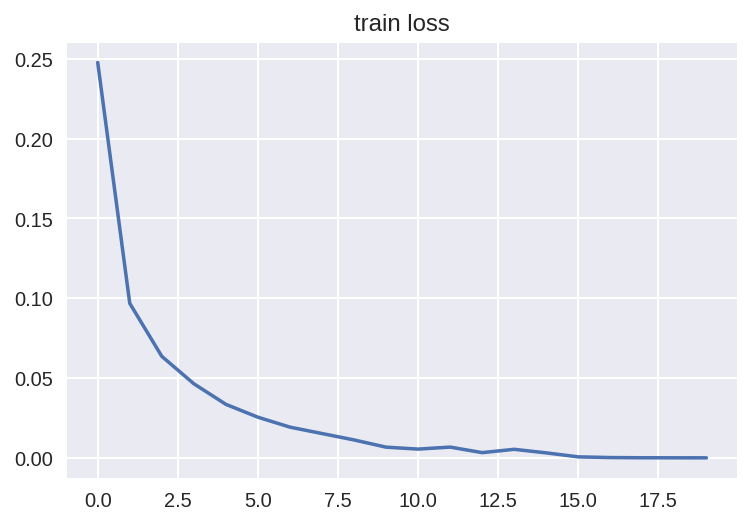

In [37]:
plt.title('train loss')
plt.plot(np.arange(len(losses)), losses)

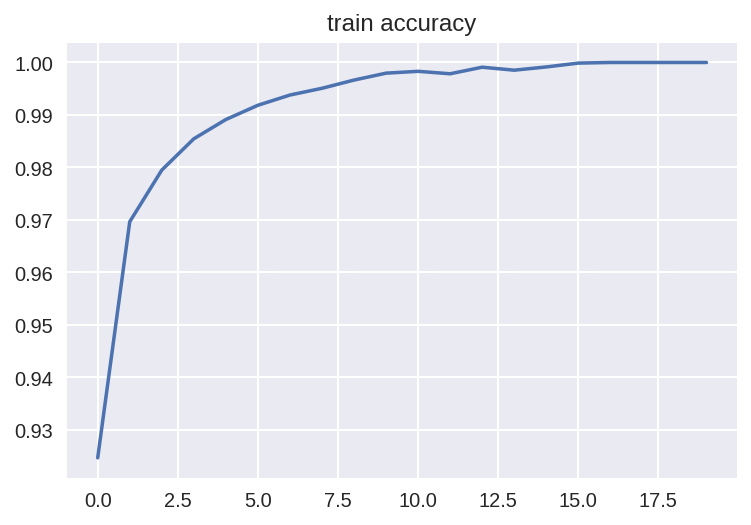

In [38]:
plt.title('train accuracy')
plt.plot(np.arange(len(acces)), acces)

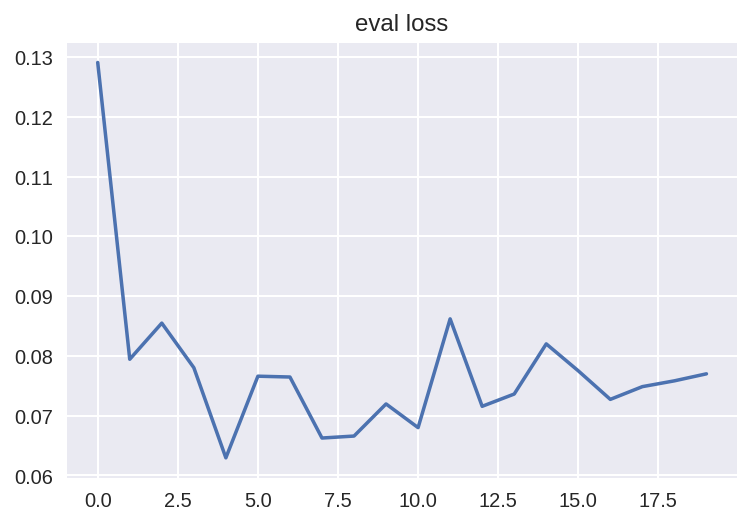

In [39]:
plt.title('eval loss')
plt.plot(np.arange(len(eval_losses)), eval_losses)

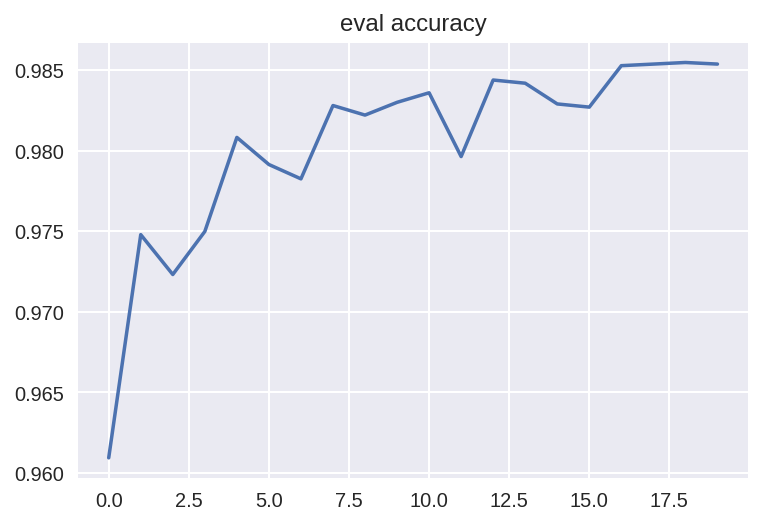

In [40]:
plt.title('eval accuracy')
plt.plot(np.arange(len(eval_acces)), eval_acces)

## 在同一张图里面显示

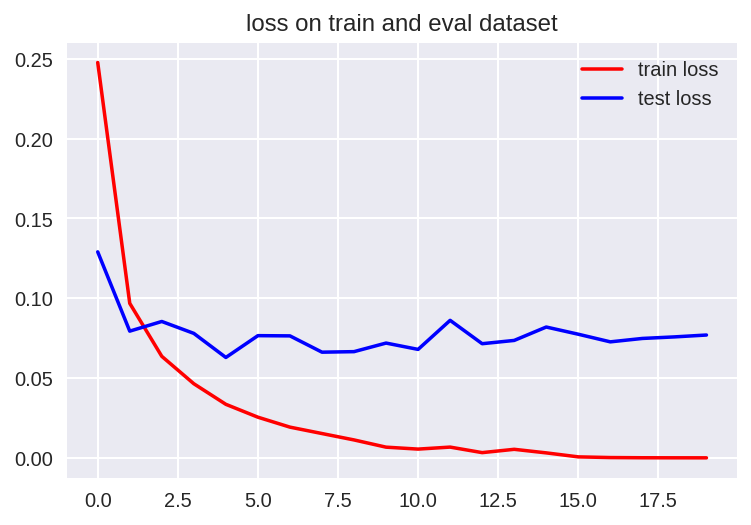

In [41]:
plt.title('loss on train and eval dataset')
plt.plot(np.arange(len(losses)), losses, 'r-', label= 'train loss')
plt.plot(np.arange(len(eval_losses)), eval_losses, 'b-', label= 'test loss')
plt.legend()

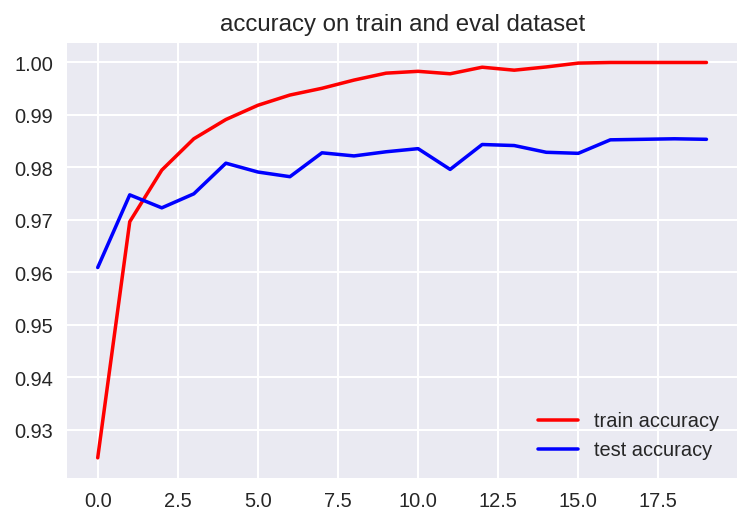

In [42]:
plt.title('accuracy on train and eval dataset')
plt.plot(np.arange(len(acces)), acces, 'r-', label= 'train accuracy')
plt.plot(np.arange(len(eval_acces)), eval_acces, 'b-', label= 'test accuracy')
plt.legend()